In [55]:
# Install skikit and nltk
# !pip install scikit-learn
!pip install nltk

In [ ]:
# usual imports + Counter
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter

In [ ]:
# import additional for ngrams using CountVectoriser
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#import additional for ngrams using NLTK
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

In [ ]:
# load AS MIST file/s into colab
from google.colab import files
uploaded = files.upload()

Saving e0599d88a5d828a6e530b4620bf7e612f7666c8ad5cf74ba876bcf070ca8fbd0.txt to e0599d88a5d828a6e530b4620bf7e612f7666c8ad5cf74ba876bcf070ca8fbd0.txt
Saving f7c5429a185569e355d9ee8597eac5d75e6079fd91713e77ec2af675fe9b7f1f.txt to f7c5429a185569e355d9ee8597eac5d75e6079fd91713e77ec2af675fe9b7f1f.txt


In [ ]:
# list of filenames
file_names = list(uploaded.keys())

# open and read the MIST files
texts = []
for file in file_names:
    with open(file, "r", encoding="utf-8") as f:
        texts.append(f.read())

# if only 1 file, check first 400 characters
# print(text[:400])

In [ ]:
# preprocess the text- convert to lowercase & remove punctuation
def preprocess_text(text):
    text = text.lower()  # convert it to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)
    return text

In [ ]:
# define vectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform([text])

# get feature names
bigrams = vectorizer.get_feature_names_out()

# convert to frequency count
bigram_counts = X.toarray().flatten()

# combine bigrams and counts
bigram_freq = dict(zip(bigrams, bigram_counts))

# sort by frequency from most common to least common
sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

# select top 10 to graph
top_n = 10
top_bigrams, top_counts = zip(*sorted_bigram_freq[:top_n])

# print most common top bigrams
print("Most Frequent Bigrams:", top_bigrams)
print("Bigram Counts:", top_counts)

Most Frequent Bigrams: ('04 09', '09 04', '04 0d', '0d 16384', '16384 0xffffffff', '0xffffffff 4096', '4096 04', '03 03', '03 kernel32', 'kernel32 03')
Bigram Counts: (1028, 1019, 853, 842, 842, 810, 808, 105, 54, 38)


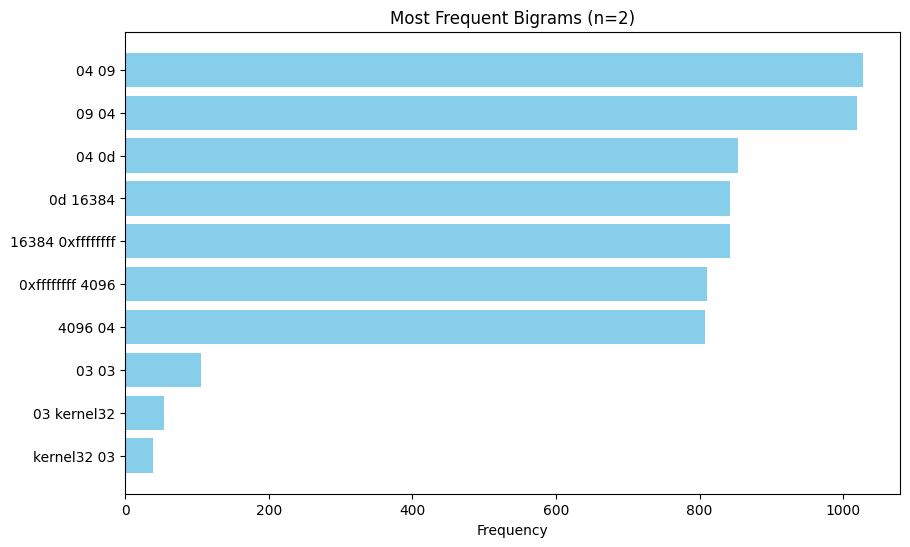

In [ ]:
#plot bigrams
plt.figure(figsize=(10, 6))
plt.barh(top_bigrams, top_counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Most Frequent Bigrams (n=2)')
plt.gca().invert_yaxis()  # most common to least common
plt.show()

Same for n=3 trigrams

In [ ]:
# define vectorizer
vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform([text])

In [ ]:
# get feature names
trigrams = vectorizer.get_feature_names_out()

# convert to frequency count
trigram_counts = X.toarray().flatten()

# combine trigrams with counts
trigram_freq = dict(zip(trigrams, trigram_counts))

# sort by frequency from most common to least common
sorted_trigram_freq = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)

# select top 10 to graph
top_n = 10
top_trigrams, top_counts = zip(*sorted_trigram_freq[:top_n])

# print most common top bigrams
print("Most Frequent Trigrams:", top_trigrams)
print("Trigram Counts:", top_counts)

Most Frequent Trigrams: ('04 09 04', '09 04 09', '04 0d 16384', '0d 16384 0xffffffff', '16384 0xffffffff 4096', '0xffffffff 4096 04', '4096 04 0d', '03 03 kernel32', '03 kernel32 03', 'kernel32 03 03')
Trigram Counts: (1019, 997, 842, 842, 810, 808, 806, 54, 38, 32)


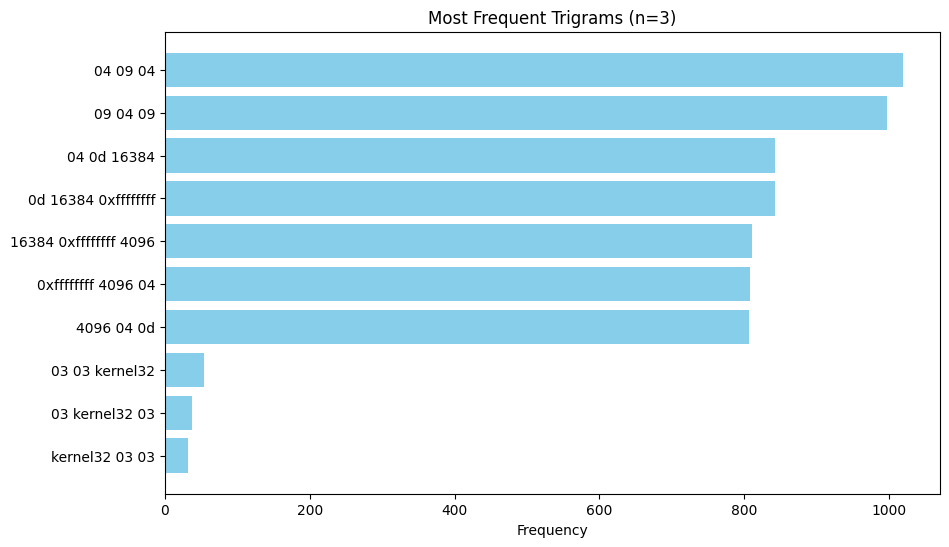

In [ ]:
# plot for trigrams
plt.figure(figsize=(10, 6))
plt.barh(top_trigrams, top_counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Most Frequent Trigrams (n=3)')
plt.gca().invert_yaxis()  # show high to low
plt.show()

Alternative to Skikit-learn is to use NLTK for ngram analysis. (This one uses PUNKT which is unsupervised)

In [ ]:
# alternative way - import tokeniser and ngrams if using NLTK
from nltk.util import ngrams
from nltk.tokenize import word_tokenize


In [ ]:
# download tokeniser (punkt = unsupervised algorithm, tab required)
nltk.download('punkt')
nltk.download('punkt_tab')

# tokenise and convert to lowercase
tokens = word_tokenize(text.lower())

# generate n-grams (n= # words in the ngram)
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))
quadgrams = list(ngrams(tokens, 4))

# diplay first 10 of each
print("Bigrams:", bigrams[:10])
print("Trigrams:", trigrams[:10])
print("Quadgrams:", quadgrams[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Bigrams: [('#', 'process'), ('process', '228'), ('228', '#'), ('#', '03'), ('03', '02'), ('02', '|'), ('|', "b'kernel32.dll"), ("b'kernel32.dll", "'"), ("'", "b'0x7c800000"), ("b'0x7c800000", "'")]
Trigrams: [('#', 'process', '228'), ('process', '228', '#'), ('228', '#', '03'), ('#', '03', '02'), ('03', '02', '|'), ('02', '|', "b'kernel32.dll"), ('|', "b'kernel32.dll", "'"), ("b'kernel32.dll", "'", "b'0x7c800000"), ("'", "b'0x7c800000", "'"), ("b'0x7c800000", "'", '03')]
Quadgrams: [('#', 'process', '228', '#'), ('process', '228', '#', '03'), ('228', '#', '03', '02'), ('#', '03', '02', '|'), ('03', '02', '|', "b'kernel32.dll"), ('02', '|', "b'kernel32.dll", "'"), ('|', "b'kernel32.dll", "'", "b'0x7c800000"), ("b'kernel32.dll", "'", "b'0x7c800000", "'"), ("'", "b'0x7c800000", "'", '03'), ("b'0x7c800000", "'", '03', '03')]


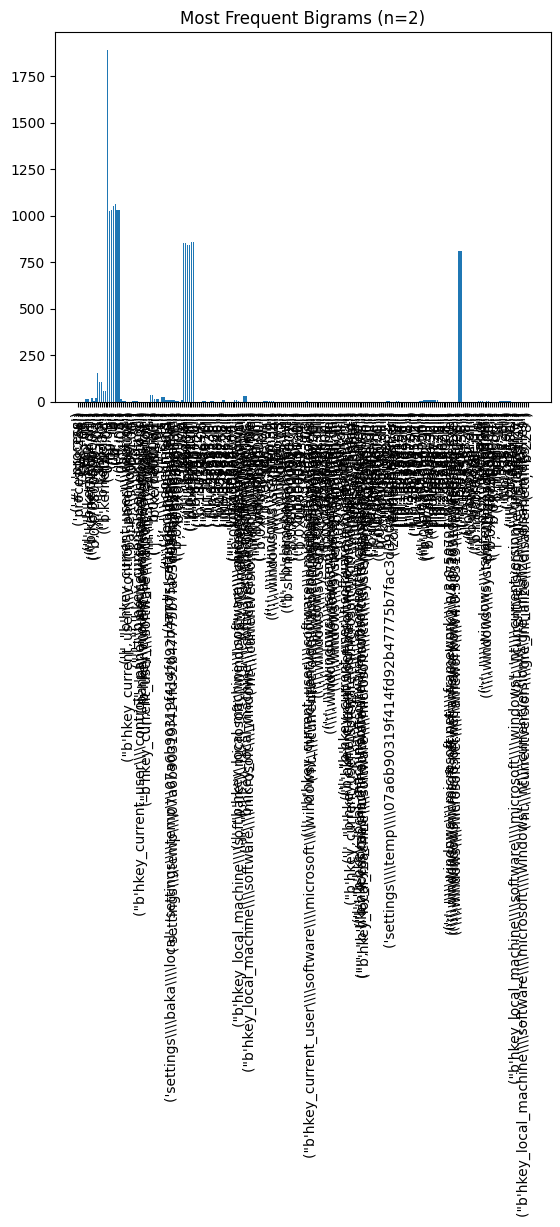

In [ ]:
#graph it
# Count bigrams
bigram_counts = Counter(bigrams)

# Plot the counts of bigrams
plt.bar([str(bigram) for bigram in bigram_counts.keys()], bigram_counts.values())
plt.xticks(rotation=90)
plt.title('Most Frequent Bigrams (n=2)')
plt.show()

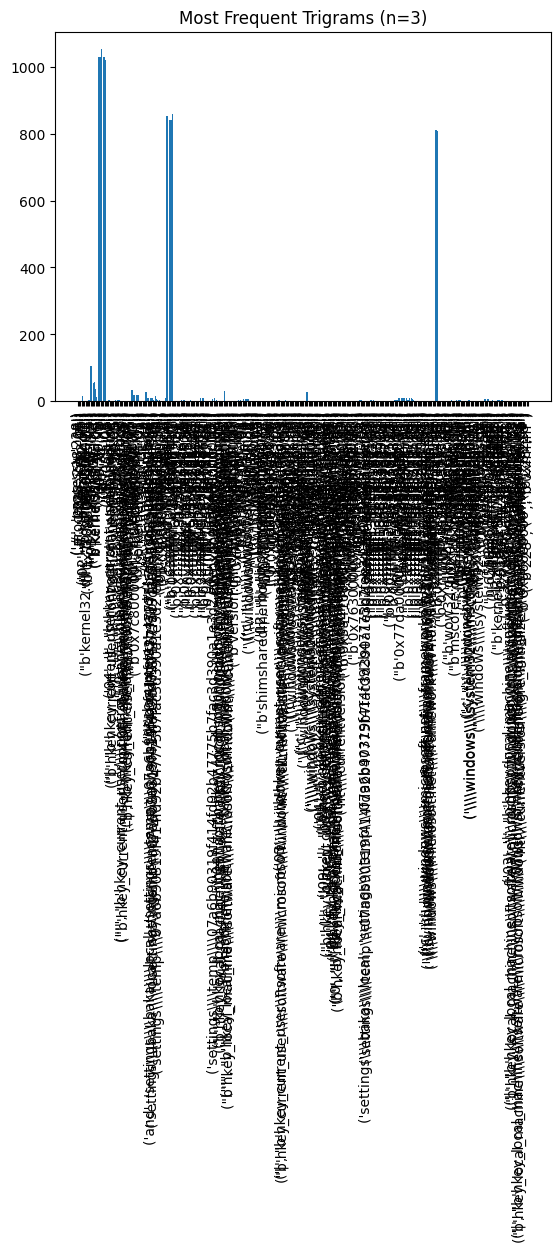

In [ ]:
#graph it
# Count trigrams
trigram_counts = Counter(trigrams)

# Plot the counts of trigrams
plt.bar([str(trigram) for trigram in trigram_counts.keys()], trigram_counts.values())
plt.xticks(rotation=90)
plt.title('Most Frequent Trigrams (n=3)')
plt.show()

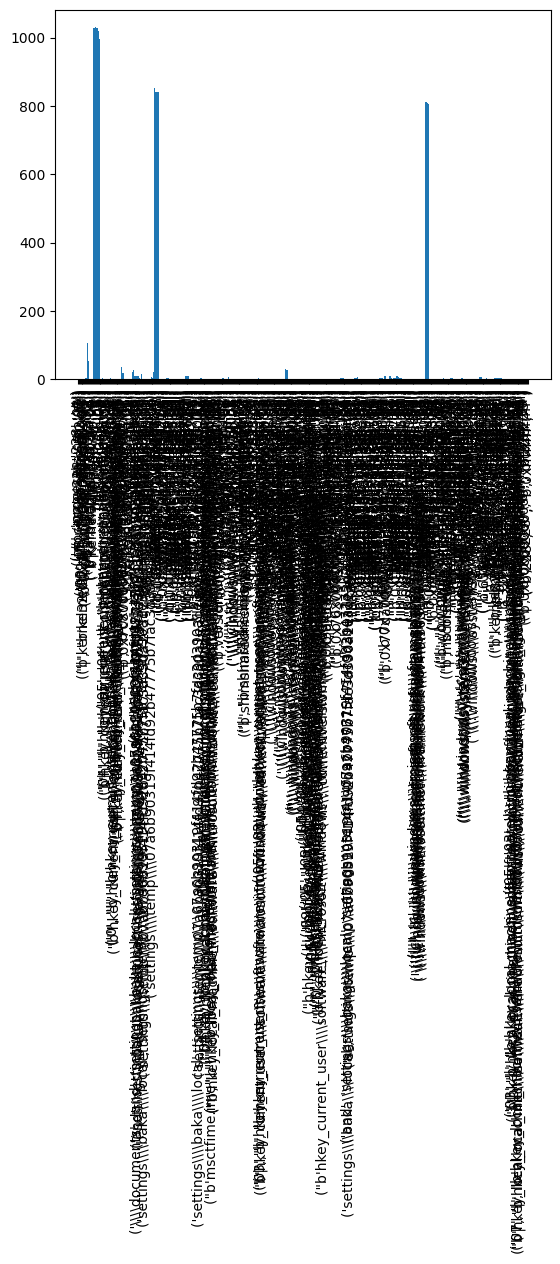

In [ ]:
#graph it
# Count quadgrams
quadgram_counts = Counter(quadgrams)

# Plot the counts of quadgrams
plt.bar([str(quadgram) for quadgram in quadgram_counts.keys()], quadgram_counts.values())
plt.xticks(rotation=90)
plt.show()